In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
hab=pd.read_csv("haberman.csv")

print(hab)
hab.shape



     30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
5    33  60   0    1
6    34  59   0    2
7    34  66   9    2
8    34  58  30    1
9    34  60   1    1
10   34  61  10    1
11   34  67   7    1
12   34  60   0    1
13   35  64  13    1
14   35  63   0    1
15   36  60   1    1
16   36  69   0    1
17   37  60   0    1
18   37  63   0    1
19   37  58   0    1
20   37  59   6    1
21   37  60  15    1
22   37  63   0    1
23   38  69  21    2
24   38  59   2    1
25   38  60   0    1
26   38  60   0    1
27   38  62   3    1
28   38  64   1    1
29   38  66   0    1
..   ..  ..  ..  ...
275  67  66   0    1
276  67  61   0    1
277  67  65   0    1
278  68  67   0    1
279  68  68   0    1
280  69  67   8    2
281  69  60   0    1
282  69  65   0    1
283  69  66   0    1
284  70  58   0    2
285  70  58   4    2
286  70  66  14    1
287  70  67   0    1
288  70  68   0    1
289  70  59   8    1
290  70  63  

(305, 4)

The Haberman's Survival Data Set has 305 data points or patient observations with four features. As explained in the data set source, it has one class attribute which is survival status in the fourth column. The survival status can be of two types:
1 = the patient survived 5 years or longer 
OR
2 = the patient died within 5 year
Now let's see how many data points or patients belong to each class:


In [2]:
hab["1.1"].value_counts()


1    224
2     81
Name: 1.1, dtype: int64

So there are 224 patients who survived 5 years or longer after the surgery and 81 patients who died within 5 years. 

**Our objective** is to find a relation between the survival status of a patient with its other features like age, year of operation and number of positve axillary nodes detected. Having that relation we can answer the survival status of a new patient of a given age and number of positve axillary nodes detected.

Note: Before doing analysis on the data set my view is that the 'year of operation' feature is least important and I predict I will find no significant relation with survival status. 

In [3]:
less5 = hab.loc[hab["1.1"] == 2];    #Classifying all patients who survived less than five years
more5 = hab.loc[hab["1.1"] == 1];   #Classifying all patients who survived more than five years


We will do univariate analysis like **PDF and CDF** for each of the two class attributes which is survival status here.

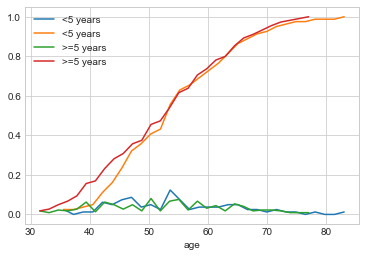

In [20]:
#Univariate analysis 
#PDF of age feature for each of the two survival status
#For patients surviving less than 5 years
counts, bin_edges = np.histogram(less5['30'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='<5 years')
plt.plot(bin_edges[1:], cdf, label='<5 years' )

#For patients surviving more than 5 years
counts, bin_edges = np.histogram(more5['30'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='>=5 years')
plt.plot(bin_edges[1:], cdf, label='>=5 years')
plt.xlabel('age')
plt.legend();
plt.show();



The above PDF plots almost completely overlaps each other. So we can't tell whether a patient has lived more or less than 5 years giver her age. 
But as we can see, below the age 35 there is no blue line which means that patient under 35 has lived more than 5 years after surgery. Also from the plot, patient above 77 years live less than 5 years after surgery (No green line after 77). So we can conclude that:
**if age is less than 35 then the patient will live 5 years or more and if patient is more than 77 she will live less than 5 years.**



Now let's have the PDF plots for another feature i.e. number of positive axillary nodes detected for each survival status

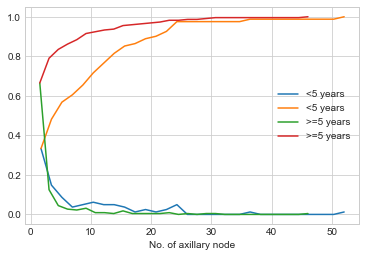

In [21]:
#For patients surviving less than 5 years
counts, bin_edges = np.histogram(less5['1'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='<5 years')
plt.plot(bin_edges[1:], cdf, label='<5 years' )

#For patients surviving more than 5 years
counts, bin_edges = np.histogram(more5['1'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='>=5 years')
plt.plot(bin_edges[1:], cdf, label='>=5 years')
plt.xlabel('No. of axillary node')
plt.legend();
plt.show();



Again we see that the PDFs are completely overlapping. So we can't distinguish between the two survival status using no. of positive axillary nodes as feature.

Now we shall plot **boxplots and violin plots** with survival status on x axis and age and no. of axillary nodes on y axis respectively.

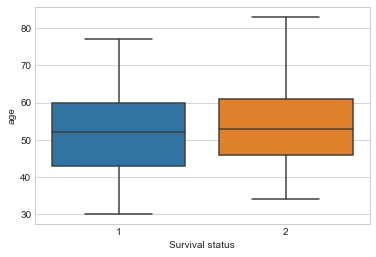

In [23]:
#Box plot with age on y axis
sns.boxplot(x='1.1',y='30', data=hab)
plt.ylabel('age')
plt.xlabel('Survival status')
plt.show()

As we can see the box plots too overlaps each other. Both medians are almost at the same age and also no significant difference in 25th and 75th percentiles.

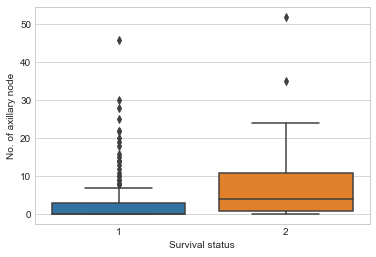

In [24]:
# Box plot with no. of axillary node in y axis
sns.boxplot(x='1.1',y='1', data=hab)
plt.ylabel('No. of axillary node')
plt.xlabel('Survival status')
plt.show()

From this box plot we might roughly come to conclusion that **if no. of positive axillary nodes is greater than 7 then the patient will live less than 5 years after surgery.**
The above conclusion has a significant amount of error or exception as we can see lot of data points above the blue box plot.


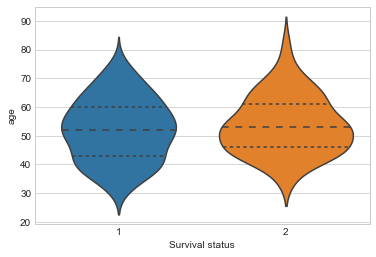

In [25]:
#Violin plot with age in y axis
sns.violinplot(x="1.1", y="30", data=hab, inner="quartile", size=8)
plt.ylabel('age')
plt.xlabel('Survival status')
plt.show()

As expected the violin plots with age on y axis almost overlaps each other and cannot distinguish between the two survival status.

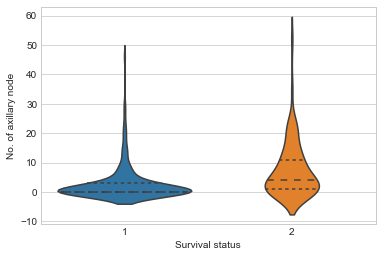

In [26]:
#violin plots with no. of positive axillary nodes on y axis.
sns.violinplot(x="1.1", y="1", inner="quartile", data=hab, size=8)
plt.ylabel('No. of axillary node')
plt.xlabel('Survival status')
plt.show()

We see that the 3rd quartile of the blue plot lies around 4. **So we can conclude with 25% error that if number of positive axillary nodes is roughly above 4 then the patient will live less than 5 years after surgery. **

Now let's perform bi variate analysis like scatter plots and pair plots to see if we can find any significant conclusion.

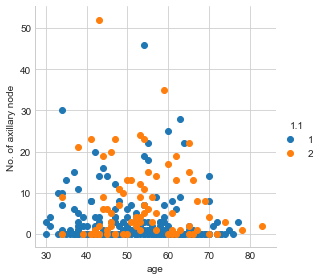

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(hab, hue="1.1", size=4) \
   .map(plt.scatter, "30", "1") \
   .add_legend();
plt.ylabel('No. of axillary node')
plt.xlabel('age')
plt.show();

The above scatter plot has no. of positive axillary nodes in y axis and age in x axis. The blue dots corresponds to the patients who lived more than 5 years and orange dots correspond to patients who lived less than 5 years. As clearly seen the plot is hard to distinguish between the two survival status.

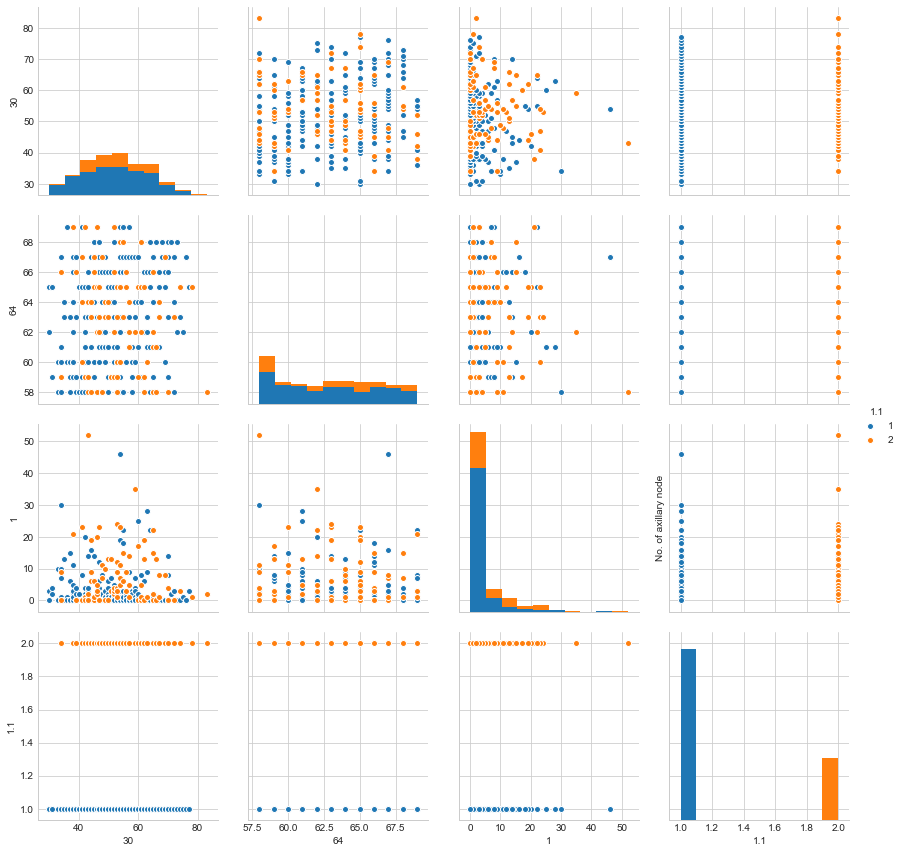

In [27]:
#pair plot for the data set
sns.set_style("whitegrid");
sns.pairplot(hab, hue="1.1", size=3);
plt.show()

As expected the above pair plot hardly helps in coming to any conclusion regarding the survival status.